In [1]:
import numpy as np 

import pandas as pd 

df = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/3004/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561715431&Signature=j%2BRVJvjNgBVXUPYBlnIj3zuAH0tLIEJsnjWm7%2FAHdt4kXHBGRA%2BebupBzf%2B8xPO7hlH6XlcuXFQPluvnFokrNazZ6QQG73Ms6dpapBOmwR%2BMgiCpcwCErljWZjhaaDllsKcQbW86iLFm0ankDHjAazu8emdH8V4rQU3QJqkeu%2BtUGVPwr78sHvb2gMMwWKRedNiOhP2gOUMf1lGwtWdC%2FQzt6aOfbaoiDtqdxav59HLJdfM00bJTaFkZ16wa7vDDDRBOAg2KAOAt%2BSCcgI6xJNjR0Ou1TyepsLvO6s3uyFCKswE7YiiT7bJaoshPtQAAOj0ewYH5B9iqoefSKI%2BpYA%3D%3D")



In [2]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:].values
y = df.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size = 0.3,
                                                random_state = 0)



In [18]:
# THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python mnist_keras_mlp.py


from keras import utils


y_train_ohe = utils.to_categorical(y_train)


from keras.models import Sequential 

from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1)

model = Sequential()

model.add(Dense(input_dim = x_train.shape[1],
                output_dim = 256,
                init = "uniform",
                activation = "relu"))

model.add(Dense(input_dim = 256,
                output_dim = 256,
                init = "uniform",
                activation = "relu"))


model.add(Dense(input_dim = 256,
                output_dim = y_train_ohe.shape[1],
                init = "uniform",
                activation = "softmax"))

sgd = SGD(lr = 0.001,decay = 1e-07, momentum = .9)
model.compile(loss = "categorical_crossentropy", optimizer = sgd)



/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256, kernel_initializer="uniform")`
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=256, activation="relu", units=256, kernel_initializer="uniform")`
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=256, activation="softmax", units=10, kernel_initializer="uniform")`


In [19]:
model.fit(x_train,
          y_train_ohe,
          epochs = 50,
          batch_size = 300,
          verbose = 0,
          validation_split = 0.1)

In [20]:
y_train_pred = model.predict_classes(x_train,verbose = 0)
train_acc = np.sum(y_train == y_train_pred,axis = 0) / x_train.shape[0]
print("Train set = {0:.2f}%".format(train_acc*100))


y_test_pred = model.predict_classes(x_test,verbose = 0)
test_acc = np.sum(y_test == y_test_pred,axis = 0) / x_test.shape[0]
print("Test set = {0:.2f}%".format(test_acc*100))

Train set = 99.63%
Test set = 96.10%


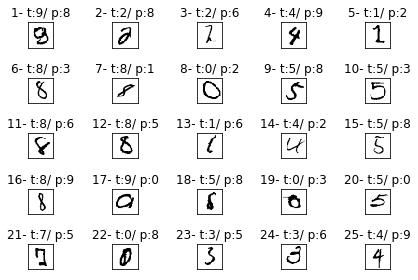

In [21]:
import matplotlib.pyplot as plt
miscl_img = x_test[y_test != y_test_pred][:25]


correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig,ax = plt.subplots(nrows = 5,
                     ncols =5,
                     sharex = True,
                     sharey = True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img,cmap = "Greys",interpolation = "nearest")
    ax[i].set_title("{0}- t:{1}/ p:{2}".format(i+1,correct_lab[i],miscl_lab[i]) )
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()